# NetworkX


**NetworkX** is a Python library for working with graphs or networks. It provides tools for creating, manipulating, and analyzing complex networks.

NetworkX is widely used in various fields, including:

- Social network analysis
- Biology
- Physics
- Computer science

It is an open-source library, which means that it is free to use, modify, and distribute.

These notebooks are based on the following tutorial from Kaggle: https://www.kaggle.com/code/alireza151/networkx-tutorial


## Installing NetworkX


If you are running this notebook online (in Google Colaboratory, for example), you can install NetworkX by running the following command:


In [83]:
# !pip install networkx

In [84]:
import matplotlib.pyplot as plt
import networkx as nx
import random

from networkx.algorithms import bipartite

## 1. Types of Networks


### A) Simple Network (undirected & unweighted)


A **network or graph** is a collection of nodes (vertices) and edges (links between nodes).

A simple network is a network where the edges are undirected and unweighted. We will understand these two concepts later.

To create a simple network, we can use the `Graph` class from NetworkX.


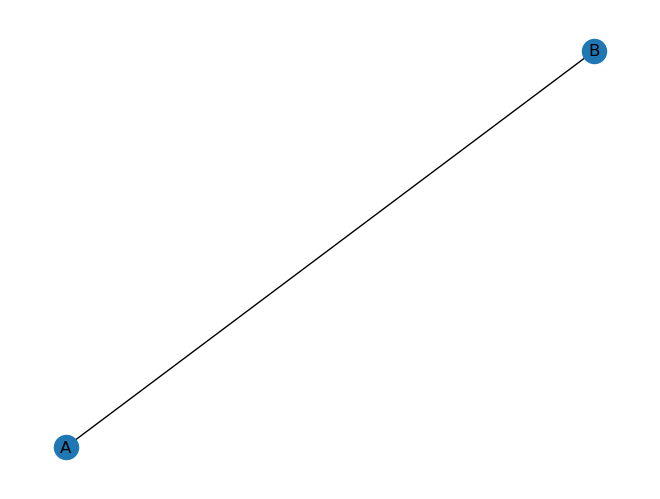

In [85]:
# We initialize an empty graph
graph = nx.Graph()

# We add an edge between node A and node B
# As these nodes do not exist yet, they will be created
graph.add_edge("A", "B")

# Networkx library can be used to visualize the graph
nx.draw(graph, with_labels=True)

### B) Weighted Network


The **weight** of an edge is a number assigned to the edge, which can represent a distance, a cost, a capacity, or any other quantity.

A **weighted graph** is a graph in which a number (the weight) is assigned to each edge.


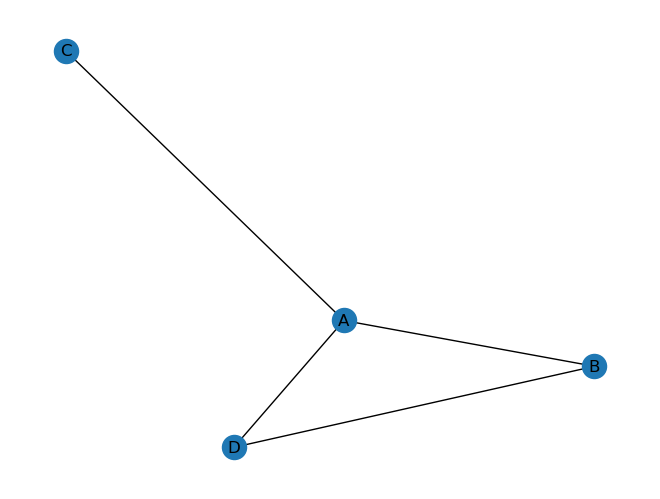

In [86]:
# Initialize an empty graph
graph_weighted = nx.Graph()

# Add several edges, and specify the weight of each edge
graph_weighted.add_edge("A", "B", weight=6)
graph_weighted.add_edge("A", "D", weight=3)
graph_weighted.add_edge("A", "C", weight=0.5)
graph_weighted.add_edge("B", "D", weight=1)

# Draw the nodes with labels
nx.draw(graph_weighted, with_labels=True)

The method `edges()` of the graph object returns a list of tuples

Each tuple represents an edge, and contains the names of the nodes it connects.


In [87]:
list(graph_weighted.edges())

[('A', 'B'), ('A', 'D'), ('A', 'C'), ('B', 'D')]

Alternatively, you can use the argument `edges(data=True)` to return a list of tuples, where each tuple contains the names of the nodes and a dictionary with the edge attributes.


In [88]:
list(graph_weighted.edges(data=True))

[('A', 'B', {'weight': 6}),
 ('A', 'D', {'weight': 3}),
 ('A', 'C', {'weight': 0.5}),
 ('B', 'D', {'weight': 1})]

We can also index the edges by using the node names. This way, we can access the attributes of a specific edge.


In [89]:
graph_weighted.edges["A", "B"]

{'weight': 6}

In [90]:
graph_weighted.edges["A", "B"]["weight"]

6

### C) Directed Network


Graph edges can have a **direction**. This means that the edge goes from one node to another, and not necessarily in the opposite direction.

In this case, the graph is called a **directed graph** or **digraph**.


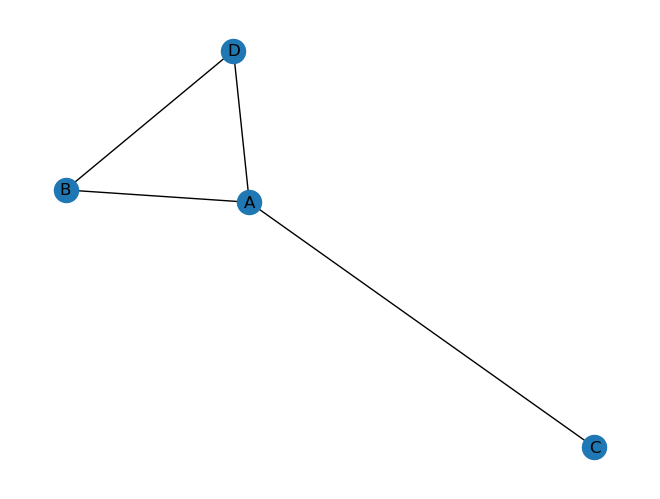

In [91]:
# Initialize an empty directed graph
graph_di = nx.DiGraph()

# Add several edges, and specify the weight of each edge
# In this case, the order of the nodes matters
graph_di.add_edge("A", "B", weight=1)  # A -> B
graph_di.add_edge("A", "D", weight=3)  # A -> D
graph_di.add_edge("A", "C", weight=1)  # A -> C
graph_di.add_edge("B", "D", weight=2)  # B -> D

# Draw the nodes with labels
nx.draw(graph_weighted, with_labels=True)

As you can see, the library does not plot the edge direction by default. In order to plot the edge direction, we need to use the `nx.draw_networkx_edges()` function, which requires us to specify the position of the nodes in the 2D plane.

First, we can call the `nx.spring_layout()` function to get the positions of the nodes. This function returns a dictionary where the keys are the node names and the values are the 2D coordinates of the nodes. There are many other layout functions, listed at the end of this subsection.


In [92]:
# Create a dictionary of positions for the nodes
pos = nx.spring_layout(graph_di)

print(pos)

{'A': array([-0.03291149,  0.00235939]), 'B': array([0.03616769, 0.48347818]), 'D': array([-0.20513248,  0.51416242]), 'C': array([ 0.20187628, -1.        ])}


Then, we can pass this dictionary to the `nx.draw_networkx_edges()` function, along with the graph object and the edge list.

We will also need to specify the edge labels, which can be done with the `nx.draw_networkx_edge_labels()` function.


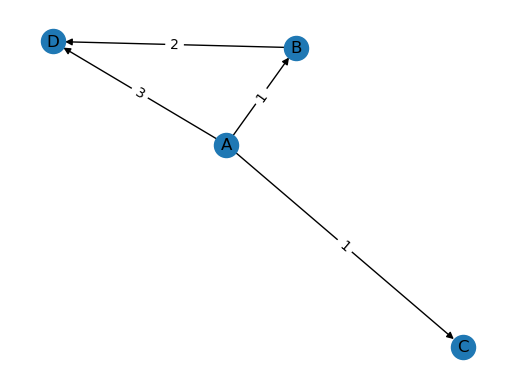

In [93]:
# Draw the graph
nx.draw_networkx_nodes(graph_di, pos)
nx.draw_networkx_edges(graph_di, pos)
nx.draw_networkx_labels(graph_di, pos)

# Create a dictionary of edge labels
edge_labels = {(u, v): d["weight"] for u, v, d in graph_di.edges(data=True)}

# Draw the edge labels
nx.draw_networkx_edge_labels(graph_di, pos, edge_labels=edge_labels)

# Show the plot
plt.axis("off")
plt.show()

In NetworkX, there are several layout algorithms that can be used to position the nodes of a graph in a visualization, including:

1. `nx.spring_layout()`: This algorithm uses a force-directed approach to layout the nodes. Nodes that are connected by edges are attracted to each other, while nodes that are not connected are repelled. The algorithm tries to minimize the energy of the system by adjusting the position of the nodes.

2. `nx.circular_layout()`: This algorithm positions the nodes evenly around a circle.

3. `nx.spectral_layout()`: This algorithm uses the eigenvectors of the graph's adjacency matrix to position the nodes. The eigenvectors are used to project the nodes into a lower-dimensional space, and the positions of the nodes are then determined by optimizing a cost function.

4. `nx.random_layout()`: This algorithm positions the nodes randomly in a given bounding box.

5. `nx.shell_layout()`: This algorithm positions the nodes in concentric circles or shells, with nodes in the same shell having the same distance to the center.

6. `nx.kamada_kawai_layout()`: This algorithm uses an iterative optimization approach to layout the nodes. The algorithm tries to minimize the stress of the system by adjusting the position of the nodes.

7. `nx.fruchterman_reingold_layout()`: This algorithm is a variation of the `nx.spring_layout()` algorithm, and also uses a force-directed approach to layout the nodes.

Each layout algorithm has its strengths and weaknesses, and the best one to use depends on the characteristics of the graph and the goals of the visualization. NetworkX allows you to easily apply these layout algorithms to your graphs and create visualizations that help you understand and communicate the structure of the network.


### D) Signed Network


A **signed network** is a network in which the edges have a sign, which can be positive or negative.


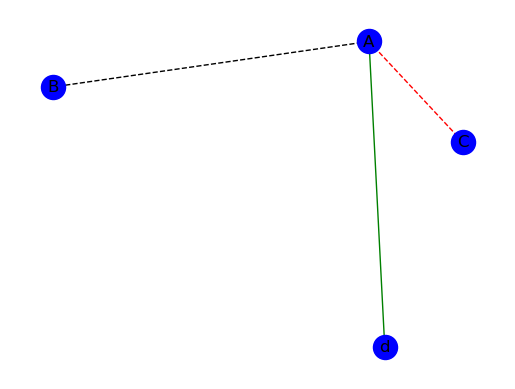

In [94]:
# Initialize an empty graph
graph_signed = nx.Graph()

# Add several edges, and specify the sign of each edge
graph_signed.add_edge("A", "B", sign="*")
graph_signed.add_edge("A", "C", sign="-")
graph_signed.add_edge("A", "d", sign="+")

# Choose a layout for the nodes
pos = nx.random_layout(graph_signed)

# Create a dictionary of edge colors based on the sign of each edge
edge_colors = {"+": "green", "-": "red", "*": "black"}
colors = [edge_colors[graph_signed[u][v]["sign"]] for u, v in graph_signed.edges()]

# Create a dictionary of edge styles based on the sign of each edge
edge_styles = {"+": "solid", "-": "dashed", "*": "dashed"}
styles = [edge_styles[graph_signed[u][v]["sign"]] for u, v in graph_signed.edges()]

# Draw the graph with colored and styled edges
nx.draw_networkx_nodes(graph_signed, pos, node_color="blue")
nx.draw_networkx_edges(graph_signed, pos, edge_color=colors, style=styles)
nx.draw_networkx_labels(graph_signed, pos)

# Show the plot
plt.axis("off")
plt.show()

### E) Multigraph


A `MultiGraph` is a type of graph in NetworkX that allows multiple edges between a pair of nodes. In other words, a `MultiGraph` can have parallel edges, while a standard `Graph` can only have a single edge between any pair of nodes.

In simpler terms, a `MultiGraph` is a network where multiple edges can connect the same nodes.


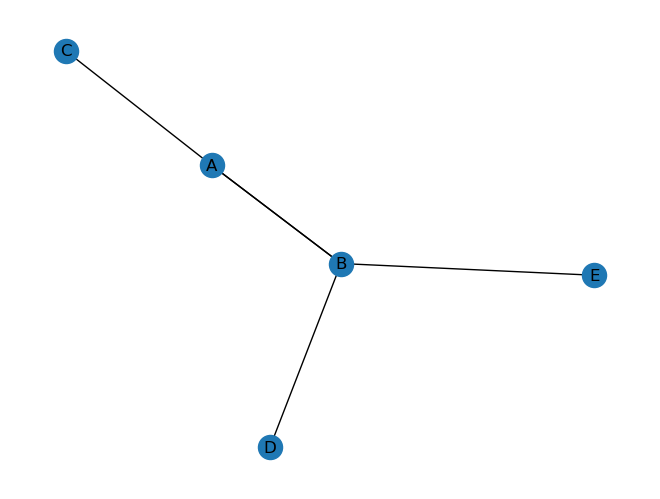

In [95]:
# Initialize an empty multigraph
graph_multi = nx.MultiGraph()

# Add several edges, and specify the relation and weight of each edge
graph_multi.add_edge("A", "B", relation="family", weight=1)
graph_multi.add_edge("A", "C", relation="family", weight=2)
graph_multi.add_edge("A", "B", relation="Work", weight=3)
graph_multi.add_edge("D", "B", relation="Work", weight=1)
graph_multi.add_edge("B", "E", relation="Friend", weight=2)

nx.draw(graph_multi, with_labels=True)

For a better visualization of the multigraph, we can use the `nx.draw_networkx_edges()` function, as we did for the directed graph.


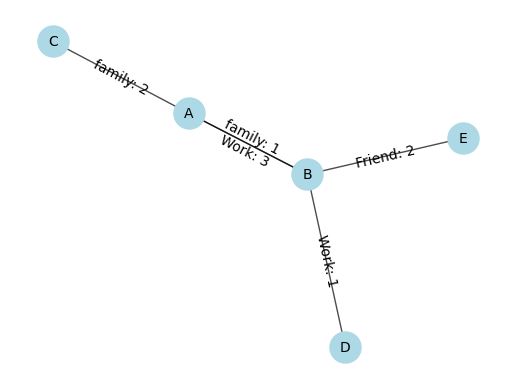

In [96]:
# Decide on a layout for the nodes
pos = nx.spring_layout(graph_multi)

# Draw the nodes
nx.draw_networkx_nodes(graph_multi, pos, node_color="lightblue", node_size=500)

# Draw the edges
edge_labels = {}
for u, v, d in graph_multi.edges(data=True):
    if (u, v) in edge_labels:
        edge_labels[(u, v)] += "\n" + d["relation"] + ": " + str(d["weight"])
    else:
        edge_labels[(u, v)] = d["relation"] + ": " + str(d["weight"])

nx.draw_networkx_edge_labels(graph_multi, pos, edge_labels=edge_labels)
nx.draw_networkx_edges(graph_multi, pos, width=1, alpha=0.7)

# Draw the labels
nx.draw_networkx_labels(graph_multi, pos, font_size=10, font_family="sans-serif")

plt.axis("off")
plt.show()

We can list the edges of a multigraph using the `edges()` method, same as we did for the simple graph.


In [97]:
list(graph_multi.edges())

[('A', 'B'), ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E')]

Similarly, we can list the edges with their attributes by using the `edges(data=True)` method.


In [98]:
list(graph_multi.edges(data=True))

[('A', 'B', {'relation': 'family', 'weight': 1}),
 ('A', 'B', {'relation': 'Work', 'weight': 3}),
 ('A', 'C', {'relation': 'family', 'weight': 2}),
 ('B', 'D', {'relation': 'Work', 'weight': 1}),
 ('B', 'E', {'relation': 'Friend', 'weight': 2})]

If instead of `True` we pass a string, we can access that attribute of the edges.


In [99]:
list(graph_multi.edges(data="relation"))

[('A', 'B', 'family'),
 ('A', 'B', 'Work'),
 ('A', 'C', 'family'),
 ('B', 'D', 'Work'),
 ('B', 'E', 'Friend')]

However, contrary to simple graphs, we cannot index the edges by using the node names.


In [100]:
# graph_multi.edges["A", "B"]  # error

Instead, we need to index by the edge key.


In [101]:
dict(graph_multi["A"]["B"])

{0: {'relation': 'family', 'weight': 1}, 1: {'relation': 'Work', 'weight': 3}}

We can get all the edges related to a specific node by using the `edges()` method with the node name as an argument.


In [102]:
list(graph_multi.edges("B"))

[('B', 'A'), ('B', 'A'), ('B', 'D'), ('B', 'E')]

**Exercise.** Get the relation of nodes "A" and "B" in the multigraph.


In [103]:
graph_multi["A"]["B"][0]["relation"]

'family'

### F) Bipartite Graph


A bipartite graph is a type of graph in which the nodes can be divided into two disjoint sets, such that all edges connect a node from one set to a node in the other set. In other words, there are no edges that connect nodes within the same set.

Bipartite graphs are useful for modeling relationships between two different types of entities, such as buyers and sellers in a market, or actors and movies in a film industry.

In NetworkX, you can create and manipulate bipartite graphs using the `bipartite` module, which provides various functions and algorithms for bipartite graphs. Additionally, there are several visualization techniques that can be used to display bipartite graphs, such as the bipartite layout, which arranges the nodes in two distinct rows.

stockholders and stocks Example:


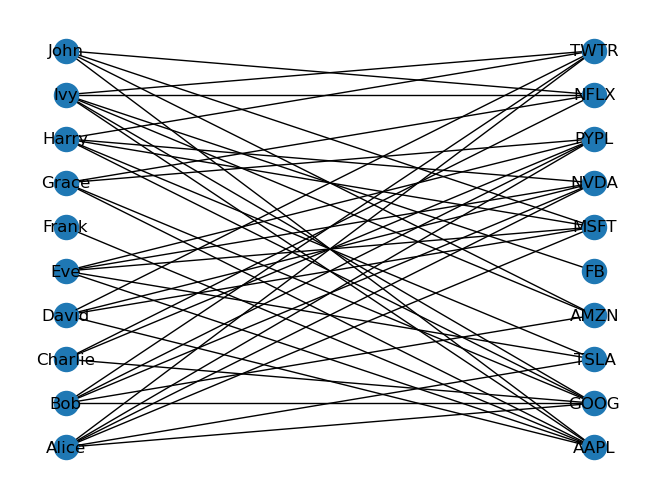

In [104]:
# List of stockholders
stockholders = [
    "Alice",
    "Bob",
    "Charlie",
    "David",
    "Eve",
    "Frank",
    "Grace",
    "Harry",
    "Ivy",
    "John",
]

# List of stocks
stocks = ["AAPL", "GOOG", "TSLA", "AMZN", "FB", "MSFT", "NVDA", "PYPL", "NFLX", "TWTR"]

# Create a bipartite graph
graph_bipartite = nx.Graph()

# Adding nodes from list
graph_bipartite.add_nodes_from(stockholders, bipartite=0)
graph_bipartite.add_nodes_from(stocks, bipartite=1)

# Adding edges randomly until the graph is connected
while not nx.is_connected(graph_bipartite):
    graph_bipartite.add_edge(random.choice(stockholders), random.choice(stocks))

# Draw the bipartite graph
pos = nx.bipartite_layout(graph_bipartite, stockholders)
nx.draw(graph_bipartite, pos, with_labels=True)

# show the plot
plt.show()

In [105]:
# Two sets of a bipartite network
bipartite.sets(graph_bipartite)

({'Alice',
  'Bob',
  'Charlie',
  'David',
  'Eve',
  'Frank',
  'Grace',
  'Harry',
  'Ivy',
  'John'},
 {'AAPL',
  'AMZN',
  'FB',
  'GOOG',
  'MSFT',
  'NFLX',
  'NVDA',
  'PYPL',
  'TSLA',
  'TWTR'})

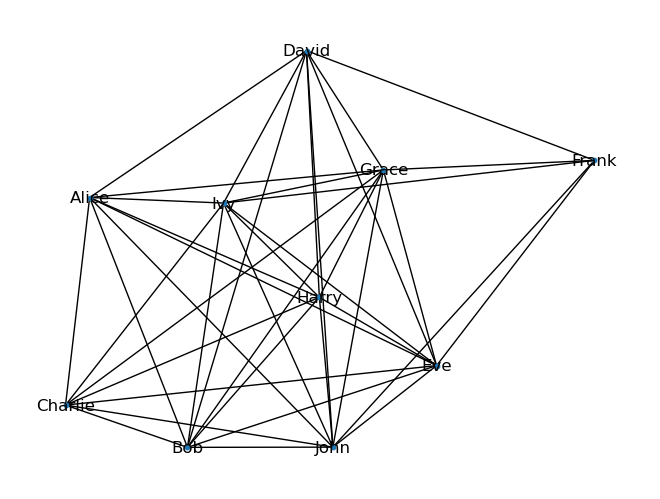

In [106]:
# L-partite graph (stockholders)
# L=left , R=right

# 2 stockholders that have a stock in common are connected

# L-partite graph
graph_projected = bipartite.projected_graph(
    graph_bipartite, bipartite.sets(graph_bipartite)[0]
)
nx.draw(graph_projected, with_labels=True, node_size=10)
plt.show()

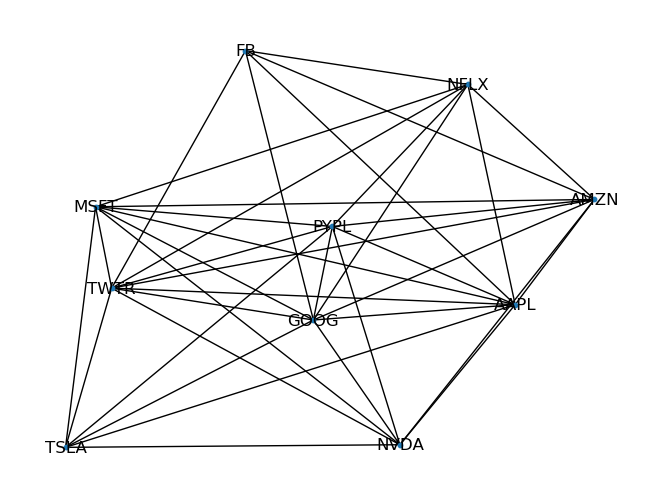

In [107]:
# R-partite graph
graph_projected = bipartite.projected_graph(
    graph_bipartite, bipartite.sets(graph_bipartite)[1]
)
nx.draw(graph_projected, with_labels=True, node_size=10)
plt.show()

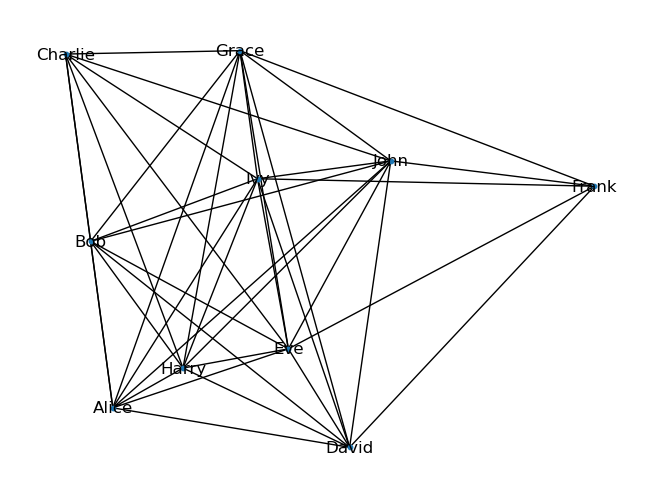

In [108]:
# A wighted L-partite
# how many in common
graph_projected = bipartite.weighted_projected_graph(
    graph_bipartite, bipartite.sets(graph_bipartite)[0]
)
nx.draw(graph_projected, with_labels=True, node_size=10)
plt.show()

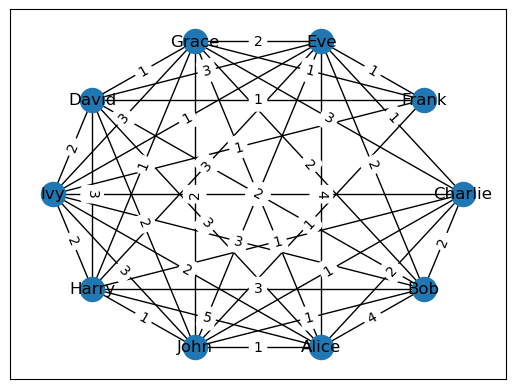

<Figure size 5000x3000 with 0 Axes>

In [109]:
# better visualization
graph_projected = bipartite.weighted_projected_graph(
    graph_bipartite, bipartite.sets(graph_bipartite)[0]
)
pos = nx.circular_layout(graph_projected)

# draw the graph
nx.draw_networkx_nodes(graph_projected, pos)
nx.draw_networkx_edges(graph_projected, pos)
nx.draw_networkx_labels(graph_projected, pos)

# create a dictionary of edge labels
edge_labels = {(u, v): d["weight"] for u, v, d in graph_projected.edges(data=True)}

# draw the edge labels
nx.draw_networkx_edge_labels(graph_projected, pos, edge_labels=edge_labels)

# show the plot
plt.figure(figsize=(50, 30))
plt.show()